<div style="border:solid Chocolate 2px; padding: 40px">

<b>Ярослав, привет!👋</b>

Меня зовут Арина Уксусова, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на ты, но если это не удобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Исследование уровня потребительской лояльности

**Цель исследования**

Определить текущий уровень потребительской лояльности (NPS) телекоммуникационной компании.

**План работы**

1. Выгрузить и отобрать необходимые данные
2. Проанализировать
3. Создать дашборд
4. Сделать презентацию

Входные даннные - **данные в SQLite с результатами опроса клиентов компании.**

In [1]:
# импортируем библиотеки

import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [2]:
# сохраняем путь БД в переменную

path_to_db_platform = '/datasets/telecomm_csi.db'
path_to_db = None

# если путь на платформе ведёт к БД, то он становится итоговым

if os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
else:
    raise Exception('Файл с базой данных SQLite не найден!')

# создаём итоговое подключение, если путь не пустой

if path_to_db:
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)

In [3]:
# сохраняем всю таблицу в переменную SQL запросом

query = """
SELECT *
FROM user;
"""

In [4]:
# считываем таблицу и выводим первые 3 строчки

df = pd.read_sql(query, engine)
df.head(3)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,55,5,5,8,10
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,21,5,5,8,10
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,28,6,9,6,10


In [5]:
# преобразовываем таблицу в csv файл

df.to_csv('telecomm_csi_tableau.csv', index=False)

In [1]:
# sql запрос для вывода необходимых столбцов

query2 = """
SELECT u.user_id,
       u.lt_day,
       (CASE
            WHEN u.lt_day > 365 THEN 'Старый'
            ELSE 'Новый'
       END) AS is_new,
       u.age,
       (CASE
            WHEN u.gender_segment = 1 THEN 'Женщина'
            ELSE 'Мужчина'
       END) AS gender_segment,
       u.os_name,
       u.cpe_type_name,
       l.country,
       l.city,
       SUBSTRING(a.title, 4) AS age_segment,
       SUBSTRING(t.title, 4) AS traffic_segment,
       SUBSTRING(ls.title, 4) AS lifetime_segment,
       u.nps_score,
       (CASE
            WHEN u.nps_score<=6 THEN 'Критик'
            WHEN u.nps_score<=8 THEN 'Нейтральный'
            ELSE 'Сторонник'
       END) AS nps_group
FROM user AS u
LEFT JOIN location l ON u.location_id=l.location_id
LEFT JOIN age_segment a ON u.age_gr_id=a.age_gr_id
LEFT JOIN traffic_segment t ON u.tr_gr_id=t.tr_gr_id
LEFT JOIN lifetime_segment ls ON u.lt_gr_id=ls.lt_gr_id;
"""

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
По запросу в целом все верно, есть только момент с выделением критиков, сторонников и нейтралов. По заданию границы интервалов для этих типов пользователей все же включены, то есть стоит применииь нестрогое неравенство (иначе говоря, `<=` или `>=`):
    
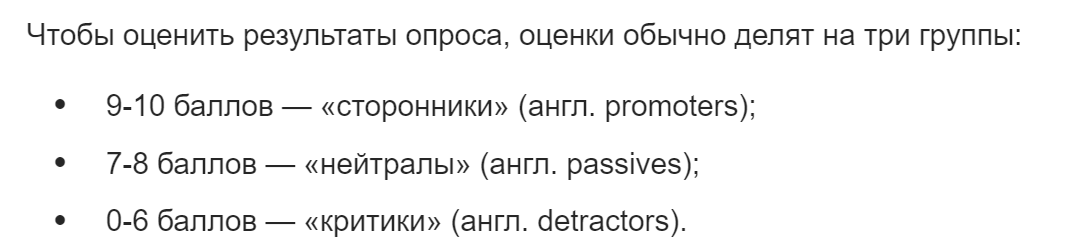
    

</div>

<div class="alert alert-info"> <b>Комментарии студента</b>

Да, я знаю, что границы конкретные, но на результат это не влияет. Это точно на доработку? Просто это странно, примерно так же, если бы я написал всё на английском: "promoters", "passives", "detractors". Я бы даже понял, если бы пример попросили исправить этот, потому что заказчик может быть русскоязычный и не поймёт. Там ведь надо всё заново, сохранять файл, строить, разве нет?</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера : вторая итерация ревью<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Если ты провел тесты и из них стало понятно, что как строгое, так и не строгое неравенства дают одинаковый результат, тогда все в порядке. Иногда это влияет на результат, case by case, конечно, но все-таки на это стоит обращать внимание.
    
Насчет русского языка в категориях - да, хорошее замечание, но тут, как ты верно заметил, стоит ориентироваться на конкретного заказчика и подстраивать "язык" дашбордов под заказчика. В учебном проекте можно оставить русскоязчные категории.
</div>

In [7]:
# сохраняем запрос в переменную и выводим первые 3 строки

data = pd.read_sql(query2, engine)
data.head(3)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,Старый,45.0,Женщина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,Сторонник
1,A001WF,2344,Старый,53.0,Мужчина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,Сторонник
2,A003Q7,467,Старый,57.0,Мужчина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,Сторонник


In [8]:
# преобразуем таблицу в csv файл

data.to_csv('telecomm_csi_tableau.csv', index=False)

# Общий вывод

Задачей проекта было определение текущего уровеня потребительской лояльности (NPS) среди клиентов из России.

**Этапы исследования**

1. Работа с данными
 - Выгрузка
 - Отбор необходимых данных
 - Сохранение
2. Анализ данных
 - Построение визуализаций
 - Выявление взаимосвязей
 - Расчёт показателя NPS
3. Создание дашборда
4. Подготовка презентации

**Выводы исследования**

1. Итоговое значение NPS -  **21.98%**
2. Наибольшее число участников среди мужчин и женщин представлено в возрастных категориях 25-34 и 35-44
3. Старых пользователей почти в 5 раз больше новых
4. Активно участвовали в опросе клиенты из Москвы и Санкт-Петербурга
5. К наиболее лояльным группам относятся:
 - Клиенты с телефонами на Android
 - Мужчины и женщины 55-64
 - Новые клиенты
6. К менее лояльным группам относятся мужчины или женщины:
 - В возрасте 35-44 лет
 - Из Москвы или Санкт-Петербурга
 - Пользуется услугами оператора менее года
 - Телефоном на базе операционной системы Android

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Положительные моменты по итогам твоего анализа, которые хотелось бы отметить:
    
1) здорово, что ты использовал разные типы графиков для итогового дашборда
   
2) дашборд в целом хорошо спроектирован, в нем легко навигироваться
    
3) основная метрика - NPS, расчитана корректно.
    
3) отдельный плюс за добавление интерактивности в виде фильтров
    
4) по презентации тоже все в порядке: выделены цели и задачи, добавлены основные графики с краткими выводами, а также общий вывод
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
Критичные моменты, над которыми важно поработать:
    
1) логически у нас анализ разбивается на две части: в первой мы анализируем юзеров в общем, смотрим, как у нас распределены пользователи по таким категориям как возраст, пол, лайфтайм, география (город), и тут у тебя большая часть графиков есть, но стоит добавить еще аналитики, например, распределение клиентов по лайтайму (lifetime segment) и самое главное - вынести этот анализ (все графики с характеристиками клиентов) на отдельный дашборд с добавлением фильтров, которые у тебя есть сейчас
    
2) выделять по OS категорию Other не совсем корректно, потому что, если ты посмотришь на исходные категории по этому покзателю, там уже есть Other. В целом, можно вывести все эти системы, без выделения отдельных групп
    
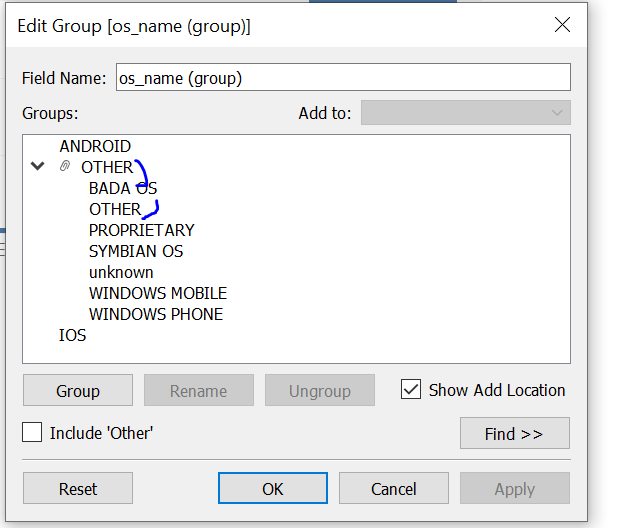
    
3) во второй части анализа мы должны проанализировать метрику NPS, которую ты считаешь. Логика может быть та же: можно посмотреть, как у нас распределена эта метрика по полу пользователей, lifetime, возрасту пользователей, городам. И эти графики также с фильтрами лучше вынести на отдельный дашборд. Важно: от нас не требуется анализа nps_Score, исходной метрики, которая была в данных и ранее. Важно сосредоточиться на анализе предрасчитанного тобой показателя NPS. Поэтому, когда ты обновишь графики (добавишь и уберешь те, что используют nps_score) презентацию также важно обновить. В целом, мы можем добавить несколько графиков по nps_score, но это должна быть дополнительная визуализация, а не основная. По сути, пока из расчитанного NPS ты выводишь только общую метрику, это верно, но недостаточно.
    


<div class="alert alert-info"> <b>Комментарии студента</b>

Исправил</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера : вторая итерация ревью<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Некоторые рекомендации по графикам, которые позволят улучшить вид дашборда:
        
1) я бы предложила заменить heatmap по городам на более понятный график. Проблема с heatmap в том, что для большей части городов мы не видим ни самого названия города (только в тултипе), ни значения по кол-ву клиентов/nps, это не информативно. Да, в презентации можно график растянуть, и будет видно больше информации, однако мы предполагаем, что дашбордом будут пользоваться наши заказчики, поэтому важно сделать его понятным и читабельным. Так как городов у нас много, здесь можно вывести топ-5, топ-10 или добавить интерактивный ползунок, чтобы пользователь дашборда сам мог менять кол-во городов на дашборде,информацию по которым он хотел бы видеть
        
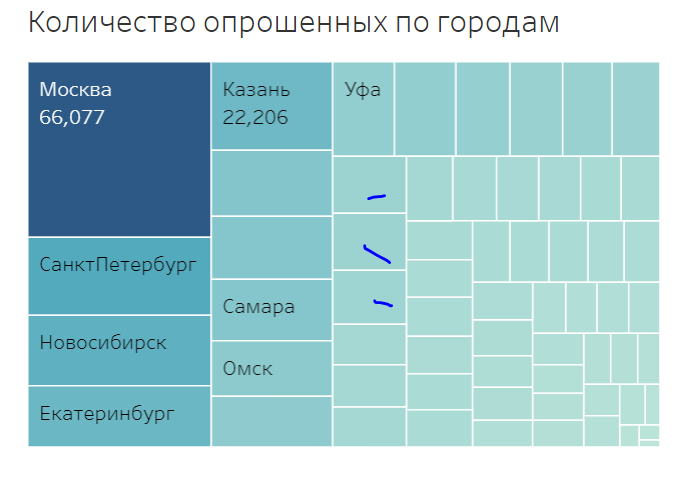
        
2) для барплотов я бы предложила выводить тоталы на границах баров, чтобы можно было точно понять, какие значение у каждого бара (например, твой график по кол-ву сторонников, критиков и нейтралов). Да, мы можем посмотреть тотал в тултипе, но лучше все же вывести значение и на график, пользователи не всегда смотрят в тултипы
        
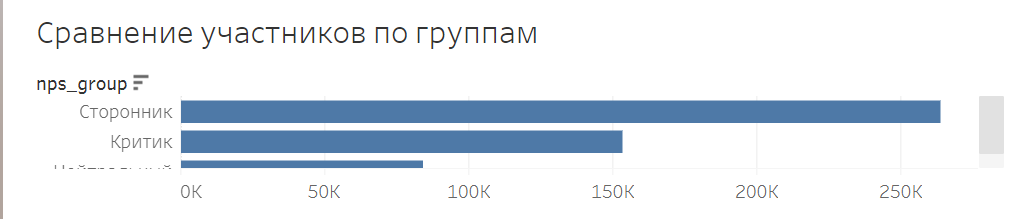
        
        
3) помимо абсолютных, можно анализировать относительные значения (доли), а абсолютные добавлять в тултип (иногда проценты просто занимают меньше места на графиках, особенно если у нас абсолютные значения выражаются в сотнях тысячах или в миллионах)  Утебя где-то выведены проценты, где-то абсолютные значения. Я бы предложила унифицировать и добавлять везде либо проценты, либо абсолютные значения. Одно из двух можно вывести в тултипе (то есть на графике показываем, например, проценты, в тултипах - абсолютные значения)
        
4) также, если у нас всего три категории (например, твой график по кол-ву сторонников, критиков и нейтралов) стоит так настроить размер дашборда, чтобы не было прокрутки. Когда у нас условно 10+ категорий, прокрутка графика оправдана, но когда их всего 3, тем более с горизонтальной ориентацией, стоит добиться того, чтобы график было видно полностью
</div>

<div class="alert alert-info"> <b>Комментарии студента</b>

Подкорректировал.

У дашборда нет ползунка у графиков, если его открывать в полный экран на сайте Tableau или если через само приложение.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера : вторая итерация ревью<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Насчет ползунка: если мы предполагаем, что пользователь дашборда догадается открывать дэш в полноэкранном режиме, тогда все в порядке. Но так бывает не всегда, иногда нужно подумать немного наперед про UX и про то, что конечный юзер никаких лишних действий скорее всего предпринимать не будет и не догадается, что они вообще нужны. Тут забота аналитика максимально подготовить дашборды к использованию, сделать их удобными для конечного пользователя:)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
По выводам:
    
* самое важное - это обновить выводы, когда будут перестроены (добавлены) новые графики, в остальном наличие блока с краткими выводами на дашборде - это плюс.

Ссылка на дашборд: https://public.tableau.com/app/profile/yaroslav.zhdanov/viz/_16900402506730/NPS_5


Ссылка на презентацию: https://disk.yandex.ru/i/hQncyHE2eHKQBg

<div class="alert alert-info"> <b>Комментарии студента</b>

Обновил ссылки на актуальный дашборд и презу.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера : вторая итерация ревью<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Все отлично, вижу новую версию дашбордов и презентации🙌

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Ярослав, спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! Оставила для тебя несколько рекомендаций в желтых и красных блоках, попробуй скорректировать проект в соответствии с моими комментариями.

 
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту:вторая итерация ревью**

Ярослав, спасибо, что прислал проект с доработками! Все основные моменты удалось скорректировать, хорошая работа!
    
Спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт🐱‍🏍
    
Желаю тебе крутых и интересных проектов на следующих спринтах🙌😉

P.S. Несколько полезных материалов/ресурсом по Tableau и дашбордам:

https://tableau.pro/m01 (марафон от Data Yoga по Tableau)

https://awdee.ru/tag/dataviz/ (неплохой ресурс про дизайн и визуализацию в целом)

https://www.data-to-viz.com/ (еще один ресурс по визуализации данных)

https://www.youtube.com/@sqlbelle (полезный блог на ютубе по Tableau с практическими примерами)